<a href="https://colab.research.google.com/github/matsunagalab/lecture_ML/blob/main/machine_learning_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第3回 回帰：基礎的事項


## 単回帰

切片1で傾き2にノイズを加えたラベルありデータ$\{y_n, x_n\}_{n=1}^{N}$を$N=100$点つくってプロットします。

Mean squared error: 0.04234936370822567
R^2 score: 0.899345242098162


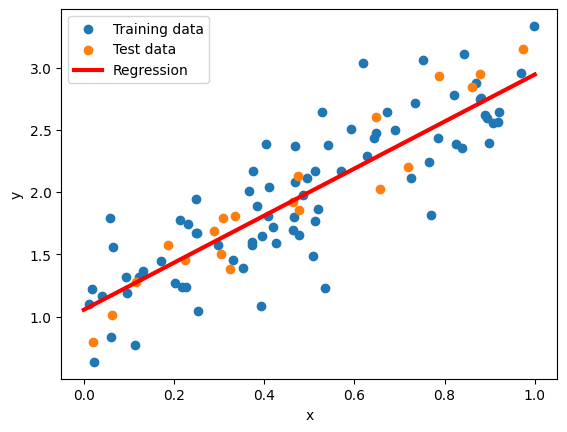

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

N = 100
x = np.random.rand(N)
y = 1.0 + 2.0 * x + 0.3 * np.random.randn(N)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Perform regression using the LinearRegression
reg = LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train)

# Make predictions on the test set
y_pred = reg.predict(x_test.reshape(-1, 1))

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate the coefficient of determination (R^2) of the predictions
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

# Plot the data and regression line
x_grid = np.linspace(0, 1, num=100)
y_hat = reg.predict(x_grid.reshape(-1, 1))
plt.scatter(x_train, y_train, label="Training data")
plt.scatter(x_test, y_test, label="Test data")
plt.plot(x_grid, y_hat, lw=3, label="Regression", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.show()

## 重回帰

$x_1$と$x_2$の2つの入力があり、切片1でそれぞれ傾き2.0と3.0のモデルにノイズを加えたラベルありデータ$\{y_n, x_n\}_{n=1}^{N}$を$N=100$点つくってプロットします。

Mean squared error: 0.05897544664783302
R^2 score: 0.9312884562382107


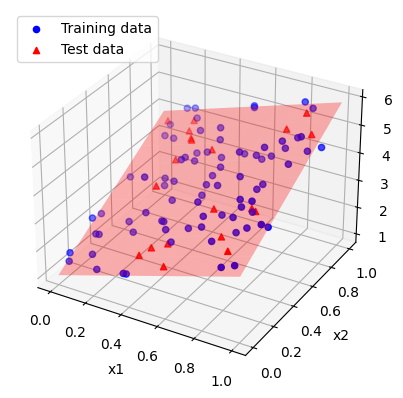

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

N = 100
x1 = np.random.rand(N)
x2 = np.random.rand(N)
y = 1.0 + 2.0 * x1 + 3.0 * x2 + 0.3 * np.random.randn(N)

# Combine the two feature arrays into a single 2D array
X = np.column_stack((x1, x2))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform regression using the LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate the coefficient of determination (R^2) of the predictions
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

# Plot the data and regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='b', marker='o', label="Training data")
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='r', marker='^', label="Test data")

x1_grid, x2_grid = np.meshgrid(np.linspace(0, 1, num=10), np.linspace(0, 1, num=10))
X_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))
y_hat = reg.predict(X_grid).reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_hat, alpha=0.3, color="red")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.legend(loc="upper left")
plt.show()

## California housing データへの応用

このデータセットは、米国カリフォルニア州の各ブロック地区における住宅価格データです。データセットには20640の観測値があり、特徴量xが8つと、目的変数yとして住宅価格が含まれています。

具体的な特徴量は以下です：
* MedInc：ブロックの中央所得
* HouseAge：ブロックの家の中央年齢
* AveRooms：世帯あたりの平均部屋数
* AveBedrms：世帯あたりの平均寝室数
* Population：ブロックの人口
* AveOccup：世帯あたりの平均家族人数
* Latitude：ブロックの緯度
* Longitude：ブロックの経度

このデータに対し重回帰分析を行って結果をプロットします。



Mean squared error: 0.5558915986952422
R^2 score: 0.5757877060324524


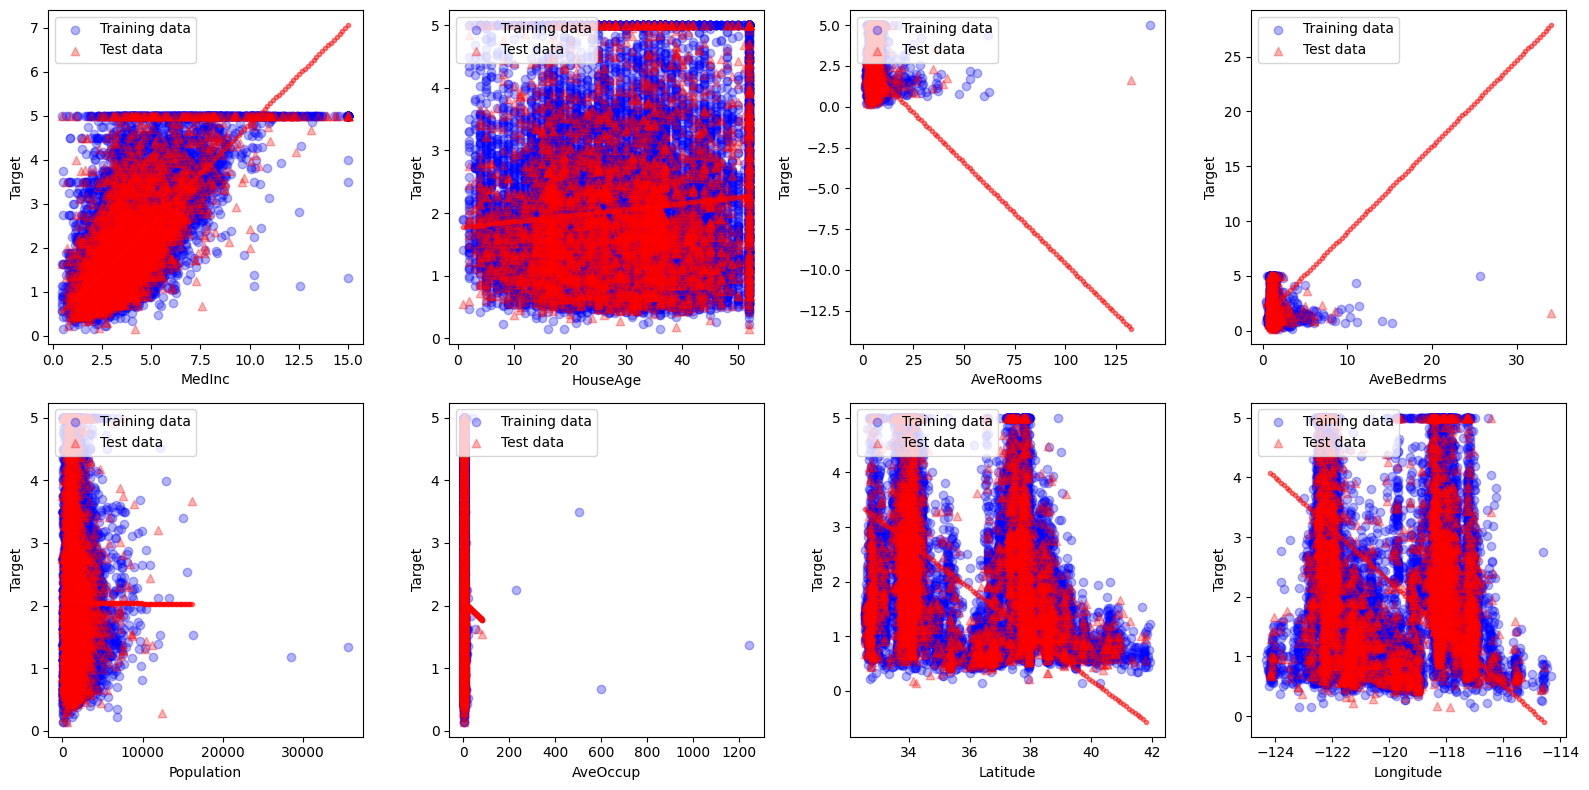

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load California housing data
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform regression using the LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate the coefficient of determination (R^2) of the predictions
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

# Plot the data and regression line for all features
n_features = X.shape[1]
n_columns = 4
n_rows = int(np.ceil(n_features / n_columns))
fig, axes = plt.subplots(n_rows, n_columns, figsize=(16, 8))

for feature in range(n_features):
    row, col = divmod(feature, n_columns)
    
    x_grid = np.linspace(X_test[:, feature].min(), X_test[:, feature].max(), num=100)
    X_test_feature = X_test.copy()
    
    for val in x_grid:
        X_test_feature[:, feature] = val
        y_hat = reg.predict(X_test_feature)
        axes[row, col].plot(val, np.mean(y_hat), 'r.', alpha=0.5)
    
    axes[row, col].scatter(X_train[:, feature], y_train, c="blue", marker="o", alpha=0.3, label="Training data")
    axes[row, col].scatter(X_test[:, feature], y_test, c="red", marker="^", alpha=0.3, label="Test data")
    axes[row, col].set_xlabel(data.feature_names[feature])
    axes[row, col].set_ylabel("Target")
    axes[row, col].legend(loc="upper left")

# Remove unused subplots
for i in range(n_features, n_columns * n_rows):
    row, col = divmod(i, n_columns)
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()